<img
    style="border-radius: 0.5em;"
    src="https://ucfai.org/groups/projects/fa19/loan-defaults/banner.png">

<div class="col-12">
    <h1> Answering the Important Question: Where's my Money? </h1>
    <hr>
</div>

<div style="line-height: 2em;">
    <p>by: 
        <a href="https://ucfai.org/authors/causallycausal">@causallycausal</a> on Oct 03, 2019</p>
</div>

In [ ]:
from pathlib import Path

DATA_DIR = Path("/kaggle/input")
if (DATA_DIR / "ucfai-projects-fa19-loan-defaults").exists():
    DATA_DIR /= "ucfai-projects-fa19-loan-defaults"
elif DATA_DIR.exists():
    # no-op to keep the proper data path for Kaggle
    pass
else:
    # You'll need to download the data from Kaggle and place it in the `data/`
    #   directory beside this notebook.
    # The data should be here: https://kaggle.com/c/ucfai-projects-fa19-loan-defaults/data
    DATA_DIR = Path("data")

## Seaborn Basics
- *If you are already familiar with Seaborn, feel free to skip this.*

Illustrating Seaborn through the visualization of the tips datasets. For more information, please visit the Seaborn documentation [here](https://seaborn.pydata.org/).

In [2]:
tips = sns.load_dataset("tips") # get the tips dataset from the internet
tips # A small dataset compared to our Lending Club dataset :)

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

### Scatter Plots 
Remember that scatter plots plot a cloud of points representing the joint distribution of two variables. In Seaborn we can use either `sns.scatterplot()` or `sns.relplot()` and note that the default `kind` of `sns.relplot()` is scatter (think of `kind` as the type of plot you want to create). Also, `sns.relplot()` is considered a `Figure-level` interface, more on that later. 

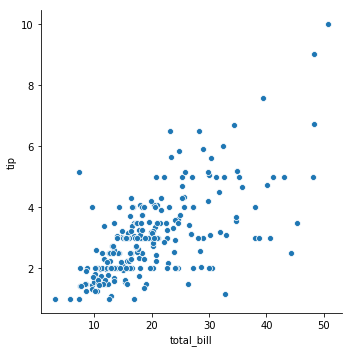

In [3]:
# Here we will plot tip against total_bill 
sns.relplot(x="total_bill", y="tip", data=tips); # Note here x="" and y="" corresponds to the column names in the tips dataset 

Lets say we want to rename our x and y-axis to Total Bill and Tip, respectively and add a title to our plot. There are two possible ways to do this: 
1. Modifying the axes labels by calling `plt.subplots()` and use `sns.scatterplot()` to plot the data. 
2. Modifying the axes labels returned when calling a figure level function in Seaborn*. 

Both ways are illustrated below, feel free to choose whatever style you prefer. Additionally, I've found the first way is helpful when you want to plot multiple plots in a grid. (Remember that Seaborn is built on Matplotlib.) 

\* With every `Figure-Level` interface, a `FacetGrid` object is returned which you can access to make edits to your plot. Learn more about `FacetGrid` [here](http://seaborn.pydata.org/generated/seaborn.FacetGrid.html), building structured multi-plot grids in Seaborn [here](https://seaborn.pydata.org/tutorial/axis_grids.html) and 

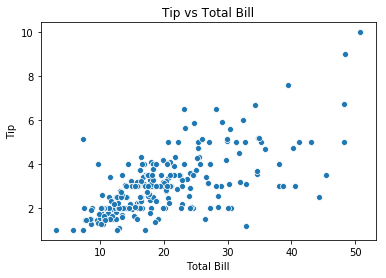

In [4]:
# Method 1. 
fig, ax = plt.subplots()
sns.scatterplot(x="total_bill", y="tip", data=tips)
ax.set_xlabel("Total Bill")
ax.set_ylabel("Tip")
ax.set_title("Tip vs Total Bill");

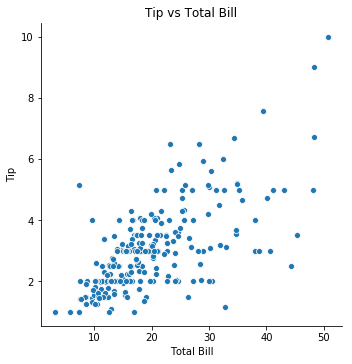

In [5]:
#Method 2. 
g = sns.relplot(x="total_bill", y="tip", data=tips)
g.set_axis_labels("Total Bill", "Tip")
g.ax.set_title("Tip vs Total Bill");

Lets add a third dimension to the plot above by coloring in the points according to the categorical variable `sex`. We can achieve this by adding the attribute `hue` to our plot.

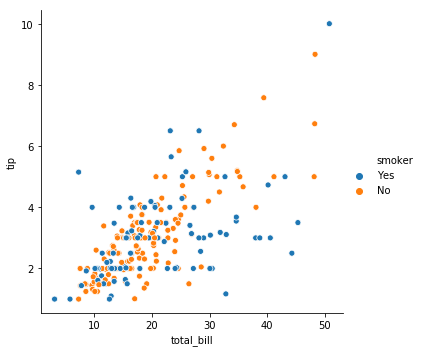

In [6]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips);

### Plotting Categorical Variables 
The figure level interface for plotting categorical variables is `sns.catplot()`. We can think of different categorical plot kinds as belonging to three different families: 
1. Categorical scatterplots:
    *     `sns.stripplot()` (with `kind="strip"`; the default)
    *     `sns.swarmplot()` (with `kind="swarm"`)

2. Categorical distribution plots:
    
    *     `sns.boxplot()` (with `kind="box"`)
    *     `sns.violinplot()` (with `kind="violin"`)
    *     `sns.boxenplot()` (with `kind="boxen"`)

3. Categorical estimate plots:
    *      `sns.pointplot()` (with `kind="point"`)
    *      `sns.barplot()` (with `kind="bar"`)
    *      `sns.countplot()` (with `kind="count"`)
 
 Below are some examples of each categorical plot.

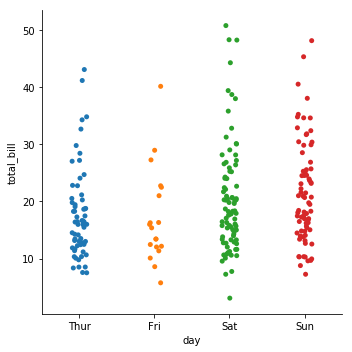

In [7]:
# Categorical scatterplots
# Here we show how to plot total_bill within each day 
# To prevent from overlapping try kind="swarm"
sns.catplot(x="day", y="total_bill", data=tips);

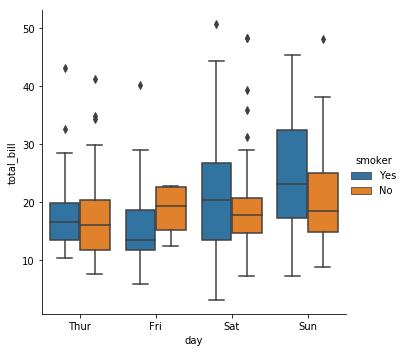

In [8]:
# Categorical distribution plots (distributions of observations within categories)
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips);

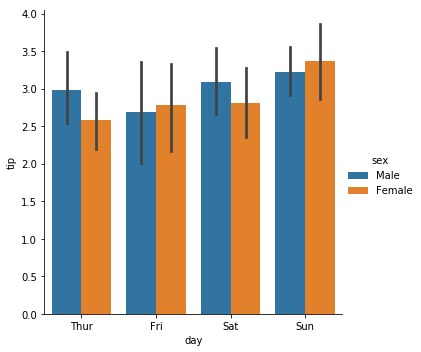

In [9]:
# Categorical estimate plots
# Here the height of the bars represent the mean (by default) and the error bars represent a confidence interval around the estimate
sns.catplot(x="day", y="tip", hue="sex", kind="bar", data=tips);

## Visualizing the Distribution of a Dataset

We end this mini-tutorial with an example of how to visualize a univariate distribution.

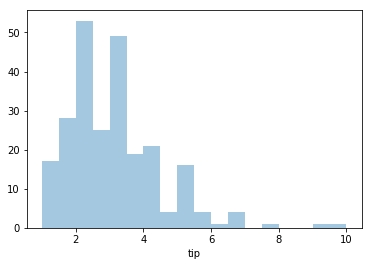

In [10]:
# Here we examine the univariate distribution of tip using histograms
sns.distplot(tips["tip"], kde=False);

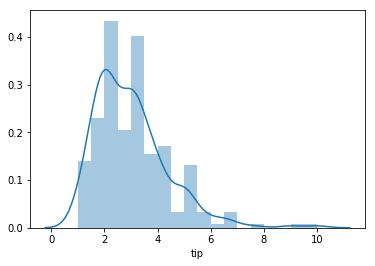

In [11]:
# Here we add a kernel density estimate (KDE) on top of the histogram.
sns.distplot(tips["tip"]);

## Exploratory Data Analysis with the Lending Club Dataset 

### Missing Value Analysis

In [12]:
# Load in the data 
train = pd.read_csv("../input/ucfai-dsg-fa19-default/train.csv") #we could set low_memory=True but it's useful to see that column numbers for exploration
test = pd.read_csv("../input/ucfai-dsg-fa19-default/test.csv")

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (18,54,111,122,123,124,127,128,129,132,138,139,140) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (18,46,54,111,122,123,124,127,128,129,132) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
# Take a look at the data with describe 
### BEGIN SOLUTION
train.describe()
### END SOLUTION

id  member_id     loan_amnt   funded_amnt  funded_amnt_inv  \
count  1.048575e+06        0.0  1.048575e+06  1.048575e+06     1.048575e+06   
mean   5.242870e+05        NaN  1.538487e+04  1.538485e+04     1.537975e+04   
std    3.026977e+05        NaN  9.533838e+03  9.533840e+03     9.532473e+03   
min    0.000000e+00        NaN  1.000000e+03  1.000000e+03     7.250000e+02   
25%    2.621435e+05        NaN  8.000000e+03  8.000000e+03     8.000000e+03   
50%    5.242870e+05        NaN  1.300000e+04  1.300000e+04     1.300000e+04   
75%    7.864305e+05        NaN  2.000000e+04  2.000000e+04     2.000000e+04   
max    1.048574e+06        NaN  4.000000e+04  4.000000e+04     4.000000e+04   

           int_rate   installment    annual_inc  url           dti  ...  \
count  1.048575e+06  1.048575e+06  1.048575e+06  0.0  1.047378e+06  ...   
mean   1.280290e+01  4.538249e+02  7.967461e+04  NaN  1.928933e+01  ...   
std    4.962779e+00  2.762069e+02  8.410183e+04  NaN  1.589602e+01  ...   
min    5.310000e+00  1.477000e+01  0.000000e+00  NaN -1.000000e+00  ...   
25%    9.160000e+00  2.516500e+02  4.700000e+04  NaN  1.193000e+01  ...   
50%    1.199000e+01  3.806600e+02  6.600000e+04  NaN  1.805000e+01  ...   
75%    1.549000e+01  6.094400e+02  9.500000e+04  NaN  2.502000e+01  ...   
max    3.099000e+01  1.670150e+03  9.930475e+06  NaN  9.990000e+02  ...   

       hardship_amount  hardship_length  hardship_dpd  \
count      5601.000000           5601.0   5601.000000   
mean        151.939591              3.0     13.719157   
std         125.048892              0.0      9.762366   
min           0.640000              3.0      0.000000   
25%          58.420000              3.0      5.000000   
50%         115.870000              3.0     15.000000   
75%         208.810000              3.0     22.000000   
max         845.220000              3.0     37.000000   

       orig_projected_additional_accrued_interest  \
count                                  4364.00000   
mean                                    444.72088   
std                                     365.25832   
min                                       1.92000   
25%                                     172.23750   
50%                                     342.93000   
75%                                     601.44750   
max                                    2535.66000   

       hardship_payoff_balance_amount  hardship_last_payment_amount  \
count                     5601.000000                   5601.000000   
mean                     11498.408693                    185.940887   
std                       7300.044958                    193.646146   
min                         55.730000                      0.010000   
25%                       5681.300000                     41.560000   
50%                      10128.020000                    123.450000   
75%                      15971.130000                    271.190000   
max                      40149.350000                   1407.860000   

       settlement_amount  settlement_percentage  settlement_term  \
count       14795.000000           14795.000000     14795.000000   
mean         5116.182247              47.823919        14.631227   
std          3695.404720               6.067449         7.136116   
min           138.000000               0.650000         0.000000   
25%          2222.380000              45.000000        10.000000   
50%          4264.000000              45.000000        16.000000   
75%          7063.000000              50.000000        18.000000   
max         28503.000000              97.660000        65.000000   

       GOOD_STANDING  
count   1.048575e+06  
mean    8.914966e-01  
std     3.110153e-01  
min     0.000000e+00  
25%     1.000000e+00  
50%     1.000000e+00  
75%     1.000000e+00  
max     1.000000e+00  

[8 rows x 110 columns]

In [14]:
# Take a look at the categorical data
### BEGIN SOLUTION
train.describe(include=['O'])
### END SOLUTION

term    grade sub_grade emp_title emp_length home_ownership  \
count      1048575  1048575   1048575    958131     971110        1048575   
unique           2        7        35    233592         11              4   
top      36 months        B        B4   Teacher  10+ years       MORTGAGE   
freq        749095   312159     68368     19219     350501         509737   

       verification_status  issue_d pymnt_plan desc  ... hardship_status  \
count              1048575  1048575    1048575   30  ...            5601   
unique                   3       27          2   24  ...               3   
top        Source Verified   Mar-16          n       ...       COMPLETED   
freq                428109    61992    1048286    7  ...            3993   

       hardship_start_date hardship_end_date payment_plan_start_date  \
count                 5601              5601                    5601   
unique                  26                27                      26   
top                 Sep-17            Dec-17                  Sep-17   
freq                  1336              1016                     960   

       hardship_loan_status disbursement_method debt_settlement_flag  \
count                  5601             1048575              1048575   
unique                    5                   2                    2   
top       Late (16-30 days)                Cash                    N   
freq                   2486              974323              1033780   

       debt_settlement_flag_date settlement_status settlement_date  
count                      14795             14795           14795  
unique                        33                 3              35  
top                       Feb-19            ACTIVE          Oct-18  
freq                        1466              8045             844  

[4 rows x 35 columns]

In [15]:
# Count number of columns with at least one missing value
### BEGIN SOLUTION
train.isnull().any(axis=0).sum()
### END SOLUTION

75

In [16]:
# Percent columns that contain at least one missing value
### BEGIN SOLUTION
train.isnull().any(axis=0).sum() / train.shape[1]
### END SOLUTION

0.5172413793103449

In [17]:
# Count number of row with at least one missing value
### BEGIN SOLUTION
train.isnull().any(axis=1).sum()
### END SOLUTION

1048575

In [18]:
# Calculate the percentage of rows that contain at least one missing value
### BEGIN SOLUTION
train.isnull().any(axis=1).sum() / train.shape[0]
### END SOLUTION

1.0

In [19]:
# Count number of columns with at least one missing value
### BEGIN SOLUTION
train.isnull().any(axis=0).sum()
### END SOLUTION

75

In [20]:
# Calculate the percentage of nulls in each column 
### BEGIN SOLUTION
train.isnull().sum(axis=0) / train.shape[0]
### END SOLUTION

id                       0.00000
member_id                1.00000
loan_amnt                0.00000
funded_amnt              0.00000
funded_amnt_inv          0.00000
                          ...   
settlement_date          0.98589
settlement_amount        0.98589
settlement_percentage    0.98589
settlement_term          0.98589
GOOD_STANDING            0.00000
Length: 145, dtype: float64

In [21]:
# Find the number of columns that have over 90% nulls in them 
### BEGIN SOLUTION
((train.isnull().sum(axis=0) / train.shape[0]) > 0.90).sum()
### END SOLUTION

37

### Visualizing the Distributions of Loan Amount, Funded Amount, and Funded Amount by Investors

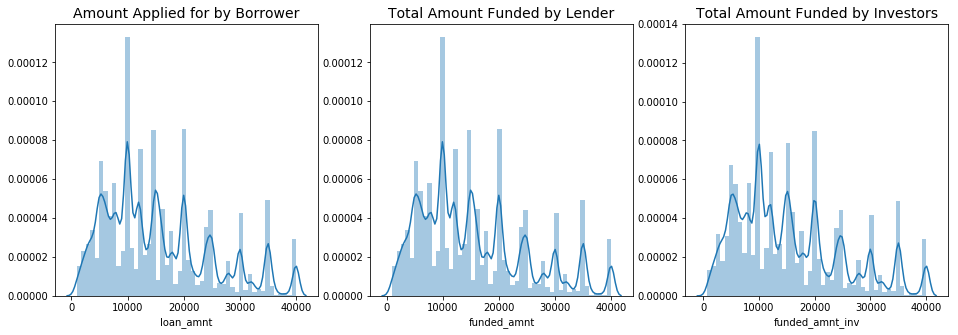

In [22]:
#visualize loan_amnt, funded_amnt, and funded_amnt_inv for the train dataset 
### BEGIN SOLUTION
fig, ax = plt.subplots(1, 3,figsize=(16,5))

sns.distplot(train["loan_amnt"], ax=ax[0])
ax[0].set_title("Amount Applied for by Borrower", fontsize=14)

sns.distplot(train["funded_amnt"], ax=ax[1])
ax[1].set_title("Total Amount Funded by Lender", fontsize=14)

sns.distplot(train["funded_amnt_inv"], ax=ax[2])
ax[2].set_title("Total Amount Funded by Investors", fontsize=14);
### END SOLUTION

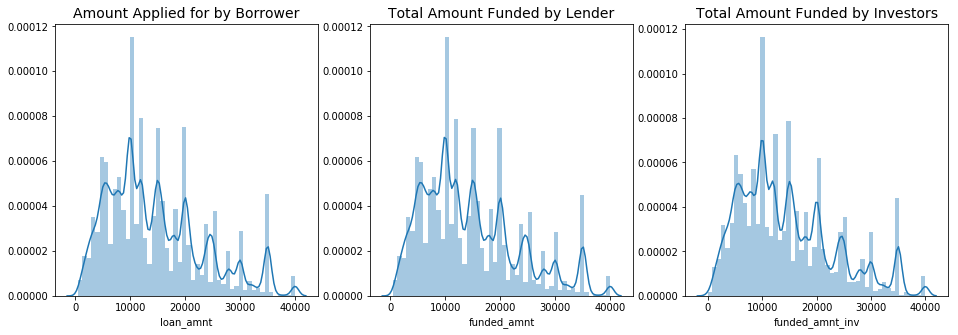

In [23]:
#visualize loan_amnt, funded_amnt, and funded_amnt_inv for the test dataset 
### BEGIN SOLUTION
fig, ax = plt.subplots(1, 3,figsize=(16,5))

sns.distplot(test["loan_amnt"], ax=ax[0])
ax[0].set_title("Amount Applied for by Borrower", fontsize=14)

sns.distplot(test["funded_amnt"], ax=ax[1])
ax[1].set_title("Total Amount Funded by Lender", fontsize=14)

sns.distplot(test["funded_amnt_inv"], ax=ax[2])
ax[2].set_title("Total Amount Funded by Investors", fontsize=14);
### END SOLUTION

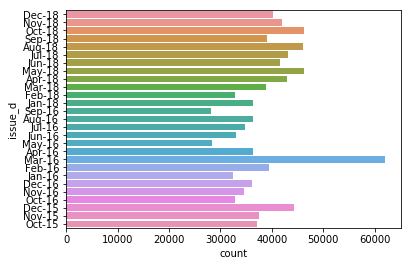

In [24]:
# Plot the number of loans issued per month
### BEGIN SOLUTION
sns.countplot(y=train["issue_d"]);
### END SOLUTION

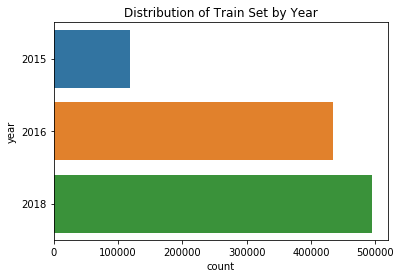

In [25]:
# Convert "issue_d" to pandas datetime format for the train set and then plot the number of loans issued per year 
### BEGIN SOLUTION
dt_series = pd.to_datetime(train["issue_d"], format = "%b-%y")
train['year'] = dt_series.dt.year
sns.countplot(y=train['year'])
plt.title("Distribution of Train Set by Year");
### END SOLUTION

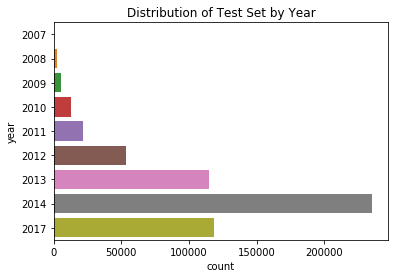

In [26]:
# Convert "issue_d" to pandas datetime format for the test set and then plot the number of loans issued per year 
### BEGIN SOLUTION
dt_series_test = pd.to_datetime(test["issue_d"], format = "%b-%y")
test['year'] = dt_series_test.dt.year
sns.countplot(y=test['year'])
plt.title("Distribution of Test Set by Year");
### END SOLUTION

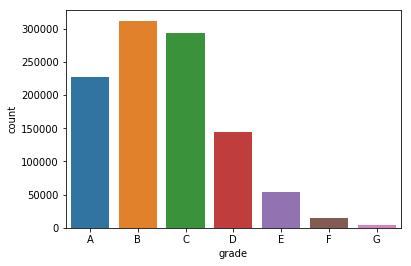

In [27]:
# Plot the number of loans within each grade category for the train set
### BEGIN SOLUTION
sns.countplot(train.sort_values(axis=0, by="grade")["grade"]);
### END SOLUTION

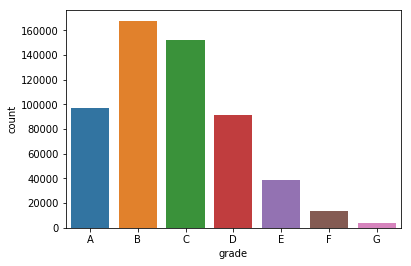

In [28]:
# Plot the number of loans within each grade category for the test set
### BEGIN SOLUTION
sns.countplot(test.sort_values(axis=0, by="grade")["grade"]);
### END SOLUTION

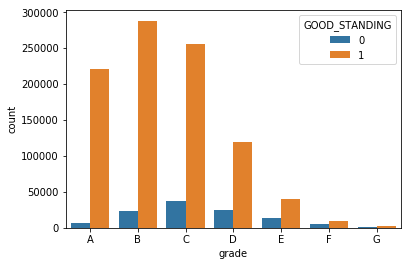

In [29]:
# Plot the number of loans within each grade category with hue train. 
### BEGIN SOLUTION
sns.countplot(train.sort_values(axis=0, by="grade")["grade"], hue=train["GOOD_STANDING"]);
### END SOLUTION

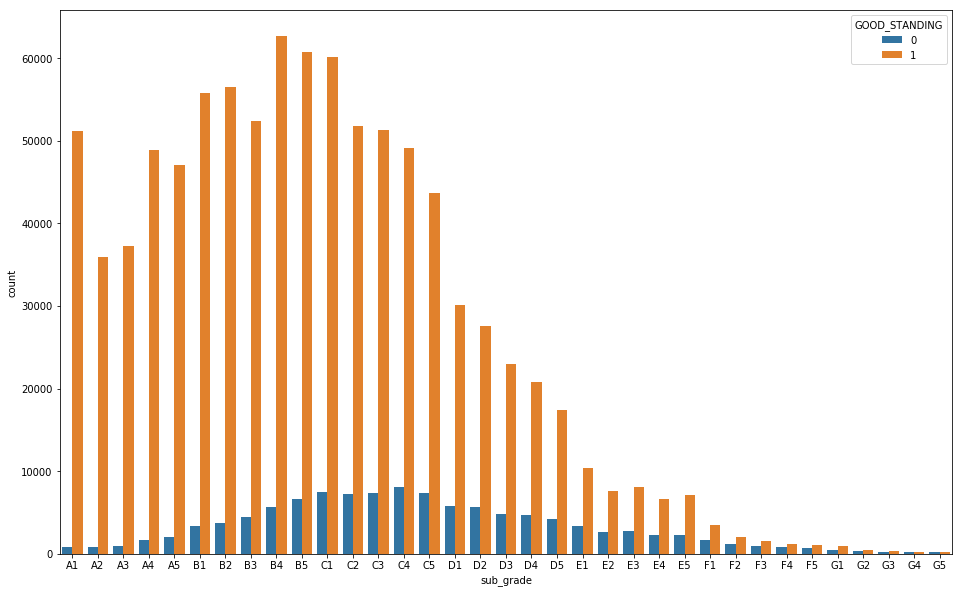

In [30]:
# Plot the number of loans within each subgrade with hue GOOD_STANDING
### BEGIN SOLUTION
fig, ax = plt.subplots(figsize=(16,10))
sns.countplot(train.sort_values(axis=0, by="sub_grade")["sub_grade"], hue=train["GOOD_STANDING"]);
### END SOLUTION

In [31]:
# import pandas_profiling

# train.profile_report()